In [1]:
from config import ALL_CLASSES, LABEL_COLORS_LIST, VIS_LABEL_MAP

In [2]:
ALL_CLASSES

['Building-flooded',
 'Building-non-flooded',
 'Road-flooded',
 'Road-non-flooded',
 'Water',
 'Tree',
 'Vehicle',
 'Pool',
 'Grass']

In [3]:
LABEL_COLORS_LIST

[[196, 0, 0],
 [255, 128, 128],
 [128, 128, 0],
 [128, 128, 128],
 [0, 191, 255],
 [34, 139, 34],
 [123, 37, 118],
 [0, 68, 255],
 [127, 224, 104]]

In [4]:
VIS_LABEL_MAP

[[196, 0, 0],
 [255, 128, 128],
 [128, 128, 0],
 [128, 128, 128],
 [0, 191, 255],
 [34, 139, 34],
 [123, 37, 118],
 [0, 68, 255],
 [127, 224, 104]]

In [5]:
import cv2
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib import pyplot as plt

class_map= {'Background':0, 'Building-flooded':1, 'Building-non-flooded':2, 'Road-flooded':3, 'Road-non-flooded':4, 'Water':5, 'Tree':6, 'Vehicle':7, 'Pool':8, 'Grass':9}

color_map = {'Background':[0, 0, 0], 'Building-flooded':[196, 0, 0], 'Building-non-flooded': [255,128,128], 'Road-flooded':[128, 128, 0],  'Road-non-flooded':[128, 128, 128],
                 'Water': [0, 191, 255], 'Tree':[34, 139, 34], 'Vehicle': [123, 37, 118],  'Pool':[0, 68, 255],'Grass':[127, 224, 104]}

handles = [Rectangle((0,0),1,1, color = (np.array(c)/255)) for n,c in color_map.items()]

labels = [n for n,c in color_map.items()]


def to_RGB(label):
    """
    Suply our labale masks as input in RGB format.
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    for key, val in class_map.items():
      label_seg [np.all(label == class_map[key],axis=-1)] = color_map[key]
    return label_seg

def display_images_with_masks(image, mask, predicted):
    plt.figure(figsize=(12, 8))
    plt.subplot(131)
    plt.title('Testing Image')
    plt.imshow(image)
    plt.subplot(132)
    plt.title('Testing Label')
    plt.imshow(mask)
    plt.subplot(133)
    plt.title('Prediction')
    plt.imshow(predicted)
    plt.legend(handles, labels, bbox_to_anchor =(-0.8,-0.5), loc='lower center', ncol=5)
    plt.show() 

In [6]:
def load_image_and_display(name):
    image_path = f'E:\Post-Flood-Disaster-Management\Segmentation\Segmentation-2\Mask2Former\input\\road_seg1\\test\images\{name}.jpg'
    mask_path = f'E:\Post-Flood-Disaster-Management\Segmentation\Segmentation-2\Mask2Former\input\\road_seg1\\test\masks\{name}.png'
    predicted_mask = f'E:\Post-Flood-Disaster-Management\Segmentation\Segmentation-2\Mask2Former\outputs(swin-large)\inference_results_image\{name}.jpg'

    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))
    mask = cv2.imread(mask_path)
    mask = cv2.resize(mask, (512, 512))
    pred = cv2.imread(predicted_mask)

    display_images_with_masks(image, mask, pred)

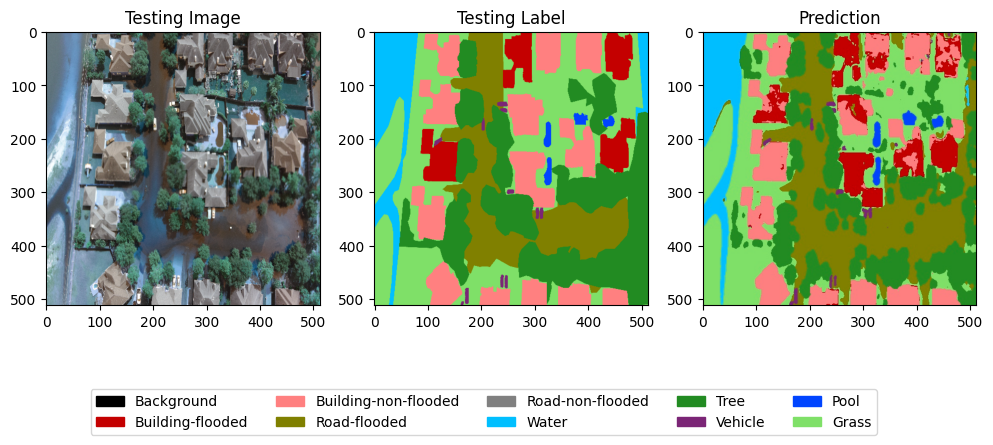

In [24]:
load_image_and_display('6700')

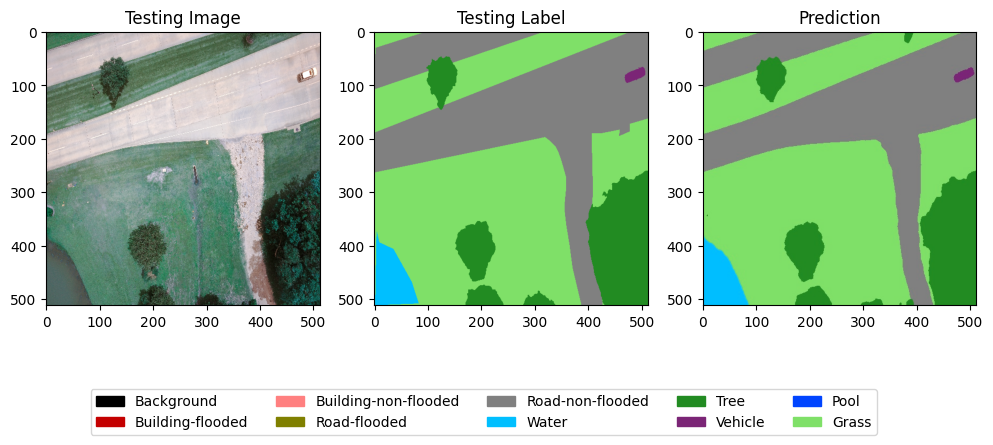

In [25]:
load_image_and_display('7899')

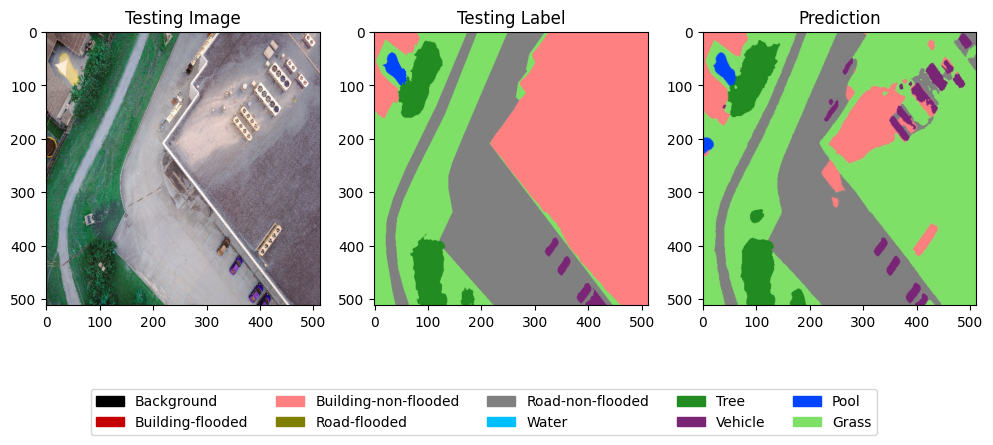

In [26]:
load_image_and_display('9042')

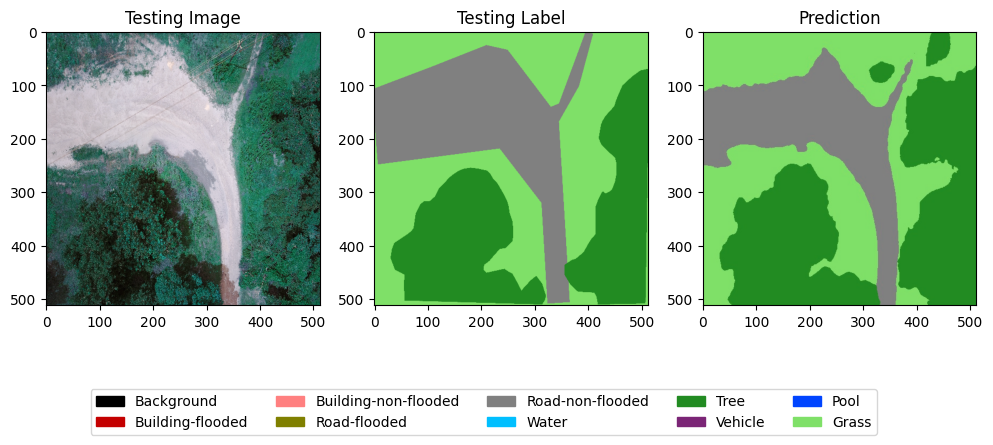

In [ ]:
load_image_and_display('7904') 

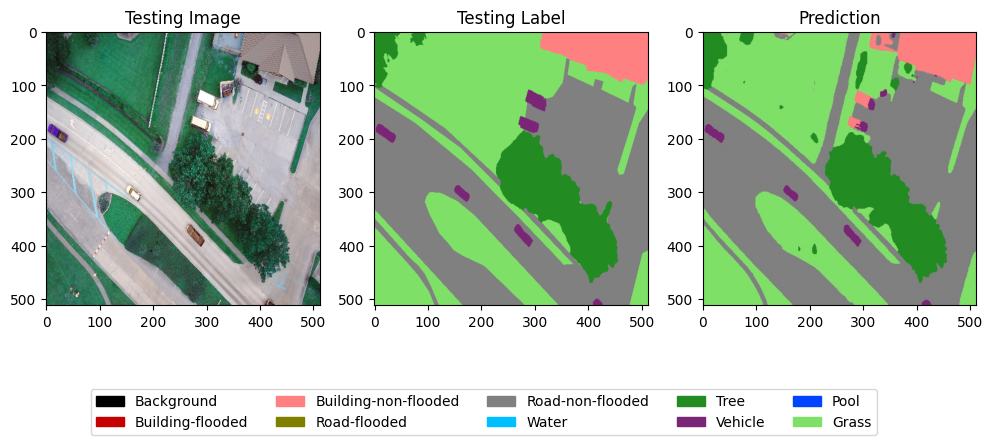

In [8]:
load_image_and_display('9035')